In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('parkinsons_updrs.csv')

In [6]:
df.head()


,total_UPDRS,Jitter(%),Shimmer,NHR,HNR,RPDE,DFA,PPE
0,34.398,0.00662,0.02565,0.014290,21.640,0.41888,0.54842,0.16006
1,34.894,0.00300,0.02024,0.011112,27.183,0.43493,0.56477,0.10810
2,35.389,0.00481,0.01675,0.020220,23.047,0.46222,0.54405,0.21014
3,35.810,0.00528,0.02309,0.027837,24.445,0.48730,0.57794,0.33277
4,36.375,0.00335,0.01703,0.011625,26.126,0.47188,0.56122,0.19361


In [8]:
df.drop(['subject#','age','sex','test_time','Shimmer:DDA','motor_UPDRS','Jitter(Abs)','Jitter:RAP','Jitter:PPQ5','Jitter:DDP','Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:APQ11', 'RPDE', 'DFA'],axis=1, inplace=True )
X = df.drop(['total_UPDRS'],1)
y = df.total_UPDRS


print(X)

      Jitter(%)  Shimmer       NHR     HNR      PPE
0       0.00662  0.02565  0.014290  21.640  0.16006
1       0.00300  0.02024  0.011112  27.183  0.10810
2       0.00481  0.01675  0.020220  23.047  0.21014
3       0.00528  0.02309  0.027837  24.445  0.33277
4       0.00335  0.01703  0.011625  26.126  0.19361
...         ...      ...       ...     ...      ...
5870    0.00406  0.01896  0.025137  22.369  0.21367
5871    0.00297  0.02315  0.011927  22.886  0.12621
5872    0.00349  0.02499  0.017701  25.065  0.14157
5873    0.00281  0.01484  0.007984  24.422  0.14204
5874    0.00282  0.01907  0.008172  23.259  0.15336

[5875 rows x 5 columns]


C:\Users\VAIBHA~1\AppData\Local\Temp/ipykernel_18932/2210851336.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop(['total_UPDRS'],1)


In [9]:
from sklearn.preprocessing import  StandardScaler
# norm_x = preprocessing.normalize(X)
# # norm_y = preprocessing.normalize(y)

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

print(X)


[[ 0.08290524 -0.32459375 -0.29872083 -0.00920476 -0.65065821]
 [-0.56079341 -0.53401614 -0.35196506  1.28264969 -1.21858474]
 [-0.23894409 -0.66911487 -0.19936959  0.31871139 -0.10328021]
 ...
 [-0.47366293 -0.35014251 -0.24157292  0.78902751 -0.85275524]
 [-0.5945787  -0.74305143 -0.40437158  0.6391696  -0.8476181 ]
 [-0.59280052 -0.57930712 -0.40122183  0.36812022 -0.72388969]]


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5, random_state=3)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2937, 5)
(2937,)
(2938, 5)
(2938,)


In [30]:
#user 1
user_vals = {'Jitter(%)' : [0.00002], 
'Shimmer' : [0.01259], 
'NHR' : [0.00581],
'HNR' : [25.703], 
# 'RPDE' : [0.4606], 
# 'DFA' :[0.646846], 
'PPE' : [0.138512]} 

user_vals1 = {'Jitter(%)' : [0.00505], 
'Shimmer' : [0.02143], 
'NHR' : [0.01166],
'HNR' : [21.118], 
'PPE' : [0.24974]} 
User_test = pd.DataFrame(user_vals)

print(User_test)

   Jitter(%)  Shimmer      NHR     HNR       PPE
0    0.00002  0.01259  0.00581  25.703  0.138512


In [31]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
print(y_train)
encoded = lab_enc.fit_transform(y_train)

print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(encoded)
print(utils.multiclass.type_of_target(encoded))

4306     9.8927
912     24.0820
218     19.3170
2963    14.6520
1909    15.5730
         ...   
789     39.5200
968     24.1090
1667    21.8930
3321    18.9160
1688    23.1220
Name: total_UPDRS, Length: 2937, dtype: float64
continuous
multiclass
[ 32 339 204 ... 276 190 308]
multiclass


In [32]:
# RandomForestClassifier

# clf = RandomForestClassifier(random_state=3)
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# # y_pred = clf.predict(X_test)

# #RandomForestRegressor 

rfr = RandomForestRegressor(n_estimators = 100, random_state=7)
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=7)

In [33]:
y_pred = rfr.predict(User_test)
# y_pred = rfr.predict(X_test)
print(y_pred) 




[18.009133]


c:\Users\Vaibhav A\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [34]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

ValueError: Found input variables with inconsistent numbers of samples: [2938, 1]

In [ ]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [35]:
import pickle

In [40]:
data = {'model' : rfr, 'scaler' : scaler}
with open('./audioRecorder/saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)
    

In [37]:
with open('./audioRecorder/saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor = data['model']

In [38]:
y_pred = regressor.predict(User_test.values)
print(y_pred)

[18.009133]


<AxesSubplot:>

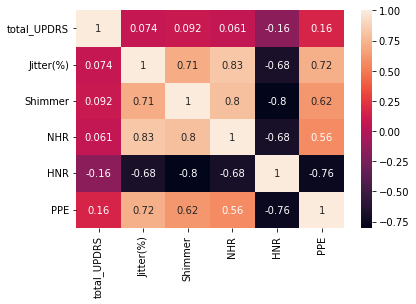

In [39]:
sns.heatmap(df[df.columns[0:7]].corr(),annot=True)